# DBLP Dataset Analysis w/ StellarGraph

## Loading data into StellarGraph from Pandas

[The StellarGraph library](https://github.com/stellargraph/stellargraph) supports loading graph information from Pandas. [Pandas](https://pandas.pydata.org) is a library for working with data frames.

The StellarGraph library supports many deep machine learning (ML) algorithms on [graphs](https://en.wikipedia.org/wiki/Graph_%28discrete_mathematics%29). A graph consists of a set of *nodes* connected by *edges*, potentially with information associated with each node and edge. Any task using the StellarGraph library needs data to be loaded into an instance of the `StellarGraph` class. This class stores the graph structure (the nodes and the edges between them), as well as information about them:

- *node types* and *edge types*: a class or category to which the nodes and edges belong, dictating what features are available on a node, and potentially signifying some sort of semantic meaning (this is different to machine learning label for a node)
- *node features* and *edge features*: vectors of numbers associated with each node or edge
- *edge weights*: a number associated with each edge

All of these are optional, because they have sensible defaults if they're not relevant to the task at hand.

> StellarGraph supports loading data from many sources with all sorts of data preprocessing, via [Pandas](https://pandas.pydata.org) DataFrames, [NumPy](https://www.numpy.org) arrays, [Neo4j](https://neo4j.com) and [NetworkX](https://networkx.github.io) graphs. See [all loading demos](README.md) for more details.

The [documentation](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.StellarGraph) for the `StellarGraph` class includes a compressed reminder of everything discussed in this file, as well as explanations of all of the parameters.

The `StellarGraph` class is available at the top level of the `stellargraph` library:

In [1]:
from stellargraph import StellarGraph

/Users/kareemrahman/.pyenv/versions/3.6.15/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


## DBLP Dataset

This dataset represents an academic network in computer science. In this data set, authors are labeled with one of four research areas: “database”, “data mining”,“machine learning” and “information retrieval”.

**dblp.edgelist**
This file contains all edges between different node types.

**dblp_labels.txt**
This file contains the assignment of one of the four labels (i.e., research areas) to each author. This will probably be useful later on as ground truth for comparison purposes.

### Step 1: Loading from .edgelist Files in Pandas Dataframes

Pandas DataFrames are tables of data that can be created from [many input sources](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html), such as [CSV files](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and [SQL databases](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html). StellarGraph builds on this power by allowing construction from these DataFrames.

The data is formatted one entry per line as follows (tab separated, "\t")

In [2]:
import pandas as pd

#Set correct directory paths to files
edgelist_filename = 'DBLP/dblp.edgelist'

# Read the file and create Node Dataframes
edgelist_df = pd.read_csv(edgelist_filename, sep=' ', names=['source', 'target'])

display(edgelist_df)

,source,target
0,p0,a1
1,p0,a2
2,p0,a3
3,p0,a4
4,p0,a5
...,...,...
51372,p10169,p8094
51373,p10169,p7974
51374,p10169,p5852
51375,p10169,p10113


In [3]:
# Extract unique node IDs for each type
def extract_nodes(df, prefix):
    nodes = pd.concat([
        df['source'][df['source'].str.startswith(prefix)],
        df['target'][df['target'].str.startswith(prefix)]
    ]).unique()
    return pd.DataFrame(nodes, columns=['node_id']).set_index('node_id')

# Extract node DataFrames for each type
authors_df = extract_nodes(edgelist_df, 'a')
topics_df = extract_nodes(edgelist_df, 't')
venues_df = extract_nodes(edgelist_df, 'v')
papers_df = extract_nodes(edgelist_df, 'p')

In [4]:
# Function to create edge DataFrame for a specific interaction, ensuring source and target prefixes
def create_edge_df(df, source_prefix, target_prefix):
    # Filter rows based on prefixes
    filtered_edges = df[(df['source'].str.startswith(source_prefix)) & (df['target'].str.startswith(target_prefix))]
    return filtered_edges

# Create edge DataFrames for each interaction type
paper_author_df = create_edge_df(edgelist_df, 'p', 'a')
paper_topic_df = create_edge_df(edgelist_df, 'p', 't')
paper_venue_df = create_edge_df(edgelist_df, 'p', 'v')
paper_paper_df = create_edge_df(edgelist_df, 'p', 'p')

In [5]:
# Display the first few rows
print(authors_df)
print("\n")
print(topics_df)
print("\n")
print(venues_df)
print("\n")
print(papers_df)
print("\n")
print(paper_author_df)
print("\n")
print(paper_topic_df)
print("\n")
print(paper_venue_df)
print("\n")
print(paper_paper_df)

Empty DataFrame
Columns: []
Index: [a1, a2, a3, a4, a5, a7, a8, a9, a10, a12, a13, a14, a15, a16, a17, a18, a20, a21, a22, a24, a25, a26, a27, a28, a30, a31, a33, a34, a36, a37, a39, a40, a42, a43, a44, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60, a61, a62, a63, a64, a65, a67, a68, a69, a70, a71, a73, a75, a76, a78, a79, a81, a82, a84, a87, a88, a91, a92, a93, a95, a97, a98, a100, a102, a103, a104, a106, a107, a108, a109, a111, a112, a114, a116, a117, a118, a120, a121, a123, a124, a125, a127, a128, a130, a131, a133, ...]

[5915 rows x 0 columns]


Empty DataFrame
Columns: []
Index: [t10191, t10192, t10193, t10194, t10195, t10196, t10197, t10198, t10199, t10200, t10201, t10202, t10203, t10204, t10205, t10206, t10207, t10208, t10209, t10210, t10211, t10212, t10213, t10214, t10215, t10216, t10217, t10218, t10219, t10220, t10221, t10222, t10223, t10224, t10225, t10226, t10227, t10228, t10229, t10230, t10231, t10232, t10233, t10234, t10235, t10236, t10237, t102

In [6]:
processed_authors_df = authors_df.copy()
processed_topics_df = topics_df.copy()
processed_venues_df = venues_df.copy()
processed_papers_df = papers_df.copy()
processed_paper_author_df = paper_author_df.copy()
processed_paper_topic_df = paper_topic_df.copy()
processed_paper_venue_df = paper_venue_df.copy()
processed_paper_paper_df = paper_paper_df.copy()

## Loading Pandas DFs into StellarGraph

### Removing Duplicates in Node DFs + Check for Uniqueness

Any duplications in node indexes within the node DFs is problematic and must be resolved.

In [7]:
#Convert indices to Series and then concatenate
all_ids = pd.concat([processed_authors_df.index.to_series(), 
                     processed_topics_df.index.to_series(), 
                     processed_venues_df.index.to_series(),
                     processed_papers_df.index.to_series()])

#Check for duplicate IDs across all node types
duplicated_ids = all_ids[all_ids.duplicated()]
if not duplicated_ids.empty:
    print("There are duplicate IDs across node types.")
    print("Duplicate IDs:", duplicated_ids.unique())
else:
    print("No duplicate IDs across node types.")

#Check if IDs contain unique values after string concatenation 
print("All concatenated IDs are unique:", all_ids.is_unique)

No duplicate IDs across node types.
All concatenated IDs are unique: True


### Removing Duplicates in Edge DFs

Any two edges that are identical in the edge DFs must be resolved. We drop the duplicates after this step.

In [8]:
# Function to check for duplicate edges in an edge DataFrame
def check_for_duplicates(edge_df, relationship_name):
    if edge_df.duplicated().any():
        print(f"There are duplicate edges in '{relationship_name}' relationship.")
        duplicate_edges = edge_df[edge_df.duplicated(keep=False)]
        print(f"Duplicate edges in '{relationship_name}' relationship:")
        print(duplicate_edges)
    else:
        print(f"No duplicate edges in '{relationship_name}' relationship.")

# Check for duplicate edges in paper-author relationships
check_for_duplicates(processed_paper_author_df, "paper-author")

# Check for duplicate edges in paper-topic relationships
check_for_duplicates(processed_paper_topic_df, "paper-topic")

# Check for duplicate edges in paper-venue relationships
check_for_duplicates(processed_paper_venue_df, "paper-venue")

# Check for duplicate edges in paper-paper relationships (citations)
check_for_duplicates(processed_paper_paper_df, "paper-paper")

No duplicate edges in 'paper-author' relationship.
No duplicate edges in 'paper-topic' relationship.
No duplicate edges in 'paper-venue' relationship.
No duplicate edges in 'paper-paper' relationship.


### Checking for Unconnected Nodes

In order for the random walks to cover ALL nodes and generate embeddings for each one, only nodes that are connected to others as part of the graph can be considered. We check for unconnected nodes by inspecting the edge dataframes and cross-checking with the node dataframes. 

If any index is in the node DF BUT NOT in ANY edge DF, THEN we drop it. 

In [9]:
# Check for isolated authors
isolated_authors = processed_authors_df.index[
    ~processed_authors_df.index.isin(processed_paper_author_df['target'])
]
if not isolated_authors.empty:
    print("Isolated author nodes:")
    print(isolated_authors)
else:
    print("No isolated author nodes.")

# Check for isolated topics
isolated_topics = processed_topics_df.index[
    ~processed_topics_df.index.isin(processed_paper_topic_df['target'])
]
if not isolated_topics.empty:
    print("Isolated topic nodes:")
    print(isolated_topics)
else:
    print("No isolated topic nodes.")

# Check for isolated venues
isolated_venues = processed_venues_df.index[
    ~processed_venues_df.index.isin(processed_paper_venue_df['target'])
]
if not isolated_venues.empty:
    print("Isolated venue nodes:")
    print(isolated_venues)
else:
    print("No isolated venue nodes.")

# Check for isolated papers
isolated_papers = processed_papers_df.index[
    ~processed_papers_df.index.isin(processed_paper_author_df['source']) &
    ~processed_papers_df.index.isin(processed_paper_topic_df['source']) &
    ~processed_papers_df.index.isin(processed_paper_venue_df['source']) &
    ~processed_papers_df.index.isin(processed_paper_paper_df['source']) &
    ~processed_papers_df.index.isin(processed_paper_paper_df['target'])
]
if not isolated_papers.empty:
    print("Isolated paper nodes:")
    print(isolated_papers)
else:
    print("No isolated paper nodes.")


No isolated author nodes.
No isolated topic nodes.
No isolated venue nodes.
No isolated paper nodes.


### Deleting Unconnected Nodes from Node DFs

If a node isn't connected to any other node through edges, it doesn't contribute to the relational information captured by your graph. Removing such nodes can streamline your data and potentially speed up computations, especially for graph algorithms that rely on edge connections. Moreover, since these nodes do not participate in any walks, they wouldn't be included in your Word2Vec training corpus anyway, making their removal from the node lists reasonable.

If any index is in the node DF BUT NOT in ANY edge DF, THEN we drop it. 

### Checking for Invalid Edges

Also, any edges that refer to nodes that are NOT in the node dataframe are considered invalid. These must also be dropped so that we can use StellarGraph.

In [10]:
# Check for invalid edge references in paper-author relationship
invalid_edges_paper_author = processed_paper_author_df[
    ~processed_paper_author_df['source'].isin(processed_papers_df.index) |
    ~processed_paper_author_df['target'].isin(processed_authors_df.index)
]
if not invalid_edges_paper_author.empty:
    print("Invalid edges in 'paper-author' relationship:")
    print(invalid_edges_paper_author)
else:
    print("No invalid edges in 'paper-author' relationship.")

# Check for invalid edge references in paper-topic relationship
invalid_edges_paper_topic = processed_paper_topic_df[
    ~processed_paper_topic_df['source'].isin(processed_papers_df.index) |
    ~processed_paper_topic_df['target'].isin(processed_topics_df.index)
]
if not invalid_edges_paper_topic.empty:
    print("Invalid edges in 'paper-topic' relationship:")
    print(invalid_edges_paper_topic)
else:
    print("No invalid edges in 'paper-topic' relationship.")

# Check for invalid edge references in paper-venue relationship
invalid_edges_paper_venue = processed_paper_venue_df[
    ~processed_paper_venue_df['source'].isin(processed_papers_df.index) |
    ~processed_paper_venue_df['target'].isin(processed_venues_df.index)
]
if not invalid_edges_paper_venue.empty:
    print("Invalid edges in 'paper-venue' relationship:")
    print(invalid_edges_paper_venue)
else:
    print("No invalid edges in 'paper-venue' relationship.")

# Check for invalid edge references in paper-paper (citation) relationship
invalid_edges_paper_paper = processed_paper_paper_df[
    ~processed_paper_paper_df['source'].isin(processed_papers_df.index) |
    ~processed_paper_paper_df['target'].isin(processed_papers_df.index)
]
if not invalid_edges_paper_paper.empty:
    print("Invalid edges in 'paper-paper' relationship:")
    print(invalid_edges_paper_paper)
else:
    print("No invalid edges in 'paper-paper' relationship.")

No invalid edges in 'paper-author' relationship.
No invalid edges in 'paper-topic' relationship.
No invalid edges in 'paper-venue' relationship.
No invalid edges in 'paper-paper' relationship.


### Final Check for StellarGraph Input

In [11]:
#Check if data types are all matching for suitable StellarGraph input
# Print data types of indices of node DataFrames
print("Data type of authors_df index:", authors_df.index.dtype)
print("Data type of topics_df index:", topics_df.index.dtype)
print("Data type of venues_df index:", venues_df.index.dtype)
print("Data type of papers_df index:", papers_df.index.dtype)

# Review each node DataFrame briefly
print("\nAuthors DF:")
print(authors_df.head())
print("\nTopics DF:")
print(topics_df.head())
print("\nVenues DF:")
print(venues_df.head())
print("\nPapers DF:")
print(papers_df.head())


# Print data types of 'source' and 'target' in edge DataFrames
print("Data type of source in paper_author_df:", processed_paper_author_df['source'].dtype)
print("Data type of target in paper_author_df:", processed_paper_author_df['target'].dtype)
print("Data type of source in paper_topic_df:", processed_paper_topic_df['source'].dtype)
print("Data type of target in paper_topic_df:", processed_paper_topic_df['target'].dtype)
print("Data type of source in paper_venue_df:", processed_paper_venue_df['source'].dtype)
print("Data type of target in paper_venue_df:", processed_paper_venue_df['target'].dtype)
print("Data type of source in paper_paper_df:", processed_paper_paper_df['source'].dtype)
print("Data type of target in paper_paper_df:", processed_paper_paper_df['target'].dtype)

# Review each edge DataFrame briefly
print("\nPaper-Author DF:")
print(processed_paper_author_df.head())
print("\nPaper-Topic DF:")
print(processed_paper_topic_df.head())
print("\nPaper-Venue DF:")
print(processed_paper_venue_df.head())
print("\nPaper-Paper DF:")
print(processed_paper_paper_df.head())

Data type of authors_df index: object
Data type of topics_df index: object
Data type of venues_df index: object
Data type of papers_df index: object

Authors DF:
Empty DataFrame
Columns: []
Index: [a1, a2, a3, a4, a5]

Topics DF:
Empty DataFrame
Columns: []
Index: [t10191, t10192, t10193, t10194, t10195]

Venues DF:
Empty DataFrame
Columns: []
Index: [v10173, v10174, v10175, v10176, v10177]

Papers DF:
Empty DataFrame
Columns: []
Index: [p0, p6, p11, p19, p23]
Data type of source in paper_author_df: object
Data type of target in paper_author_df: object
Data type of source in paper_topic_df: object
Data type of target in paper_topic_df: object
Data type of source in paper_venue_df: object
Data type of target in paper_venue_df: object
Data type of source in paper_paper_df: object
Data type of target in paper_paper_df: object

Paper-Author DF:
  source target
0     p0     a1
1     p0     a2
2     p0     a3
3     p0     a4
4     p0     a5

Paper-Topic DF:
   source  target
6      p0  t1019

We can modify the approach to create unique numerical IDs across all edge DataFrames. To do this, you can concatenate all edge DataFrames, create a unique numerical ID, and then split them back. This way, each edge in the entire dataset will have a unique ID.

This approach ensures that each edge across all your relationships has a unique, numerical identifier.

In [12]:
# Concatenate all edge DataFrames with an additional column for edge type
all_edges = pd.concat([
    processed_paper_author_df.assign(edge_type="paper-author"),
    processed_paper_topic_df.assign(edge_type="paper-topic"),
    processed_paper_venue_df.assign(edge_type="paper-venue"),
    processed_paper_paper_df.assign(edge_type="paper-paper")
]).reset_index(drop=True)

# Add unique numerical edge IDs
all_edges['edge_id'] = range(all_edges.shape[0])

# Split the DataFrames back
processed_paper_author_df = all_edges[all_edges['edge_type'] == "paper-author"].drop(['edge_type', 'edge_id'], axis=1)
processed_paper_topic_df = all_edges[all_edges['edge_type'] == "paper-topic"].drop(['edge_type', 'edge_id'], axis=1)
processed_paper_venue_df = all_edges[all_edges['edge_type'] == "paper-venue"].drop(['edge_type', 'edge_id'], axis=1)
processed_paper_paper_df = all_edges[all_edges['edge_type'] == "paper-paper"].drop(['edge_type', 'edge_id'], axis=1)

### Passing DFs into StellarGraph Function

In [13]:
# Create a dictionary for node types and corresponding DataFrames
nodes = {
    'author': authors_df,
    'topic': topics_df,
    'venue': venues_df,
    'paper': papers_df
}

# Create a dictionary for edge types and corresponding DataFrames
edges = {
    ('paper', 'author'): processed_paper_author_df,
    ('paper', 'topic'): processed_paper_topic_df,
    ('paper', 'venue'): processed_paper_venue_df,
    ('paper', 'paper'): processed_paper_paper_df
}

# Create the StellarGraph object
g = StellarGraph(nodes, edges)

print(
    "Number of nodes {} and number of edges {} in graph.".format(
        g.number_of_nodes(), g.number_of_edges()
    )
)

print("\n")

print("Below is an overview of the StellarGraph structure:")
print(g.info())

Number of nodes 15649 and number of edges 51377 in graph.


Below is an overview of the StellarGraph structure:
StellarGraph: Undirected multigraph
 Nodes: 15649, Edges: 51377

 Node types:
  author: [5915]
    Features: none
    Edge types: author-('paper', 'author')->paper
  paper: [5237]
    Features: none
    Edge types: paper-('paper', 'author')->author, paper-('paper', 'paper')->paper, paper-('paper', 'topic')->topic, paper-('paper', 'venue')->venue
  topic: [4479]
    Features: none
    Edge types: topic-('paper', 'topic')->paper
  venue: [18]
    Features: none
    Edge types: venue-('paper', 'venue')->paper

 Edge types:
    paper-('paper', 'topic')->topic: [26532]
        Weights: all 1 (default)
        Features: none
    author-('paper', 'author')->paper: [13589]
        Weights: all 1 (default)
        Features: none
    paper-('paper', 'paper')->paper: [6998]
        Weights: all 1 (default)
        Features: none
    paper-('paper', 'venue')->venue: [4258]
        Weight

## Graph Analysis

After creating a StellarGraph object, we convert it to NetworkX, since it has a larger library of functions related to graph analysis and statistics.

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

In [21]:
# Convert to NetworkX graph
nx_graph = g.to_networkx()


### Degree Distribution of Multi-type Nodes

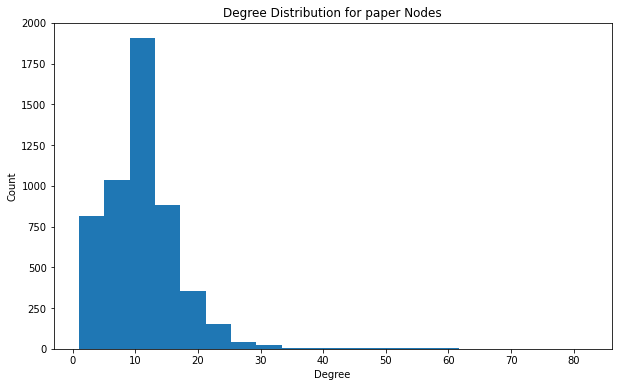

Average Degree for paper Nodes: 11.146648844758449


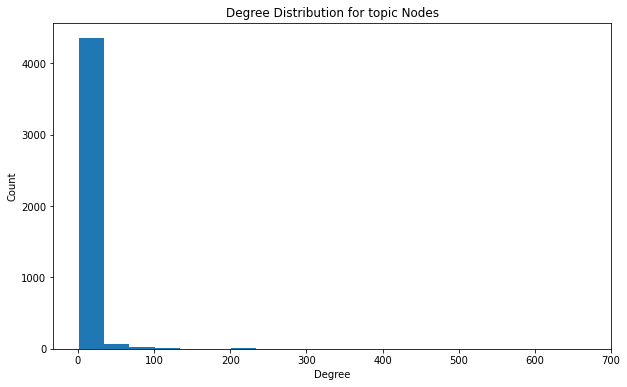

Average Degree for topic Nodes: 5.923643670462157


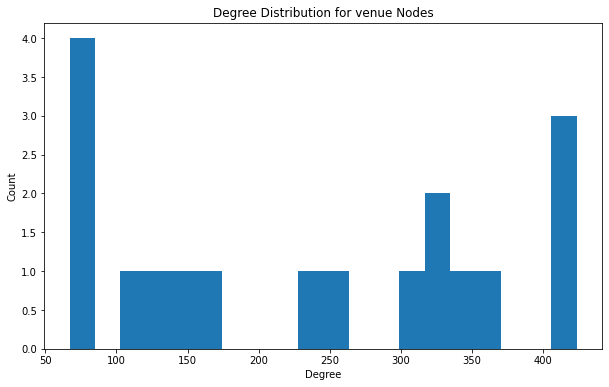

Average Degree for venue Nodes: 236.55555555555554


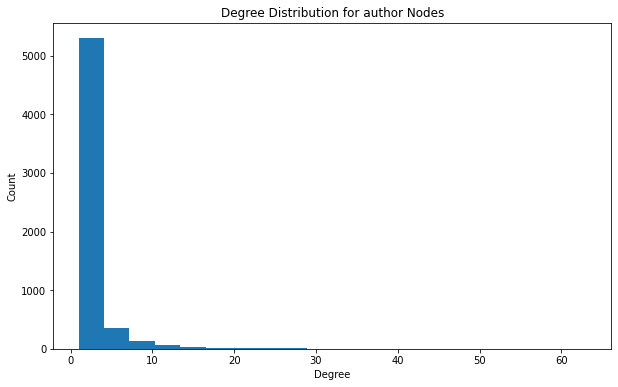

Average Degree for author Nodes: 2.2973795435333897


In [22]:
node_types = g.node_types

# Get node types
node_types = set(nx.get_node_attributes(nx_graph, 'label').values())  # Assuming 'label' is the attribute holding node types

# Calculate and plot degree distribution for each node type
for node_type in node_types:
    # Filter nodes by type
    nodes_of_type = [n for n, d in nx_graph.nodes(data=True) if d.get('label') == node_type]
    # Calculate degrees
    degrees = [nx_graph.degree(n) for n in nodes_of_type]
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=20)
    plt.title(f"Degree Distribution for {node_type} Nodes")
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.show()

    # Average degree calculation
    avg_degree = sum(degrees) / len(degrees)
    print(f"Average Degree for {node_type} Nodes: {avg_degree}")

In [29]:
# Calculate the sum of the degrees of all nodes
total_degree = sum(dict(nx_graph.degree()).values())

# Calculate the number of nodes in the graph
num_nodes = nx_graph.number_of_nodes()

# Calculate the average degree
average_degree = total_degree / num_nodes if num_nodes > 0 else 0

print(f"Average Degree of the Graph: {average_degree}")

Average Degree of the Graph: 6.566170362323471


### Portion of Different Node Types

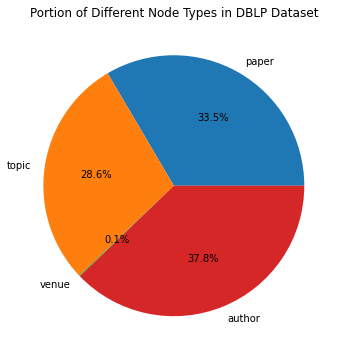

In [28]:
type_attribute_name = 'label'  # This is just an example; adjust it according to your graph's attribute names

# Extracting all node types based on the specified attribute
node_types = set(nx.get_node_attributes(nx_graph, type_attribute_name).values())

# Counting nodes for each type
node_type_counts = {node_type: 0 for node_type in node_types}
for _, node_data in nx_graph.nodes(data=True):
    node_type = node_data.get(type_attribute_name)
    if node_type in node_type_counts:
        node_type_counts[node_type] += 1

# Ensure that we remove any node type with a count of 0 (if any)
node_type_counts = {k: v for k, v in node_type_counts.items() if v > 0}

# Check to ensure we have valid data for plotting
if node_type_counts:
    # Plotting the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(node_type_counts.values(), labels=node_type_counts.keys(), autopct='%1.1f%%')
    plt.title('Portion of Different Node Types in DBLP Dataset')
    plt.show()
else:
    print("No node types with nodes found.")

### Popularity Analysis

In network analysis, such plots are often used to display the degree distribution of nodes in a graph. The X-axis represents the degree of nodes (often referred to as "popularity" in this context), and the Y-axis represents the number of nodes with that degree. When plotted on a log-log scale, many real-world networks exhibit a linear trend indicating a power-law distribution, which is characteristic of scale-free networks where a few nodes (hubs) have significantly higher degrees compared to the rest.

To recreate a plot like this, you'll want to:
- Calculate the degree of each node in the network.
- Count how many nodes have each degree.
- Plot the degree counts on a log-log scale.

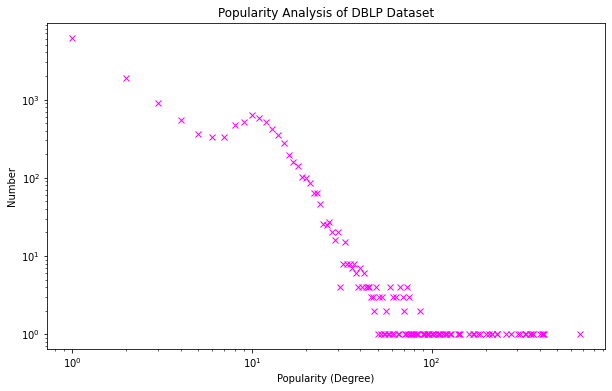

In [31]:
from collections import Counter

# Assuming your graph is stored in `nx_graph`

# Calculate the degrees of all nodes in the graph
degrees = [degree for node, degree in nx_graph.degree()]

# Count how many times each degree occurs in the network
degree_counts = Counter(degrees)

# Prepare the data for plotting
degrees, counts = zip(*degree_counts.items())

# Create a log-log plot of the degree distribution
plt.figure(figsize=(10, 6))
plt.loglog(degrees, counts, marker='x', linestyle='None', color='magenta')

# Adding titles and labels
plt.title("Popularity Analysis of DBLP Dataset")
plt.xlabel("Popularity (Degree)")
plt.ylabel("Number")

# Show the plot
plt.show()
